In [1]:
# BASIC TOOLS
import numpy as np
import pandas as pd
import datetime as dt

# STATISTIC TOOLS
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as stats
import pingouin as pg 
import statsmodels.formula.api as smf
from statsmodels.tools.tools import add_constant
from scipy.optimize import linear_sum_assignment
from lifelines import KaplanMeierFitter, NelsonAalenFitter, CoxPHFitter

# PRE - PROCESSING TOOLS 
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer, LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# SUPERVISED LEARNING TOOLS
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier, BaggingClassifier, RandomForestClassifier, RandomForestRegressor, AdaBoostClassifier, AdaBoostRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, pairwise_distances

# UNSUPERVISED LEARNING TOOLS
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.manifold import TSNE 
from sklearn.decomposition import PCA, NMF

# DEEP LEARNING TOOLS 
from sklearn.neural_network import MLPRegressor, MLPClassifier

C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.3, the latest is 0.5.5.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


# IMPORT DATA

In [2]:
xls = pd.ExcelFile('D:\\Users\\Desktop\\โครงการ\\CommunityProject\\CommunityProject.xlsx')
print(xls.sheet_names)

['dependent', 'diagnosis', 'Example']


In [3]:
fall = xls.parse('Example')
fall = fall.iloc[:, 0:]
fall

,ID,cost_T0,cost_T1,cost_T2,time_to_event(month),eventfall,fatigue,resistance,ambulation,multicomorbd,...,bmi,previousfall,alone,exercise,polypharmacy,smoking,alcohol,underlying,knowfrail,frailimpact
0,0,0.0,1000.0,1500.0,6.0,0.0,0.0,1.0,1.0,0.0,...,21.48,1.0,0.0,1.0,0.0,no,no,"[ht,dlp]",1.0,very
1,1,0.0,1000.0,1500.0,6.0,0.0,0.0,0.0,0.0,0.0,...,21.30,0.0,0.0,0.0,0.0,current,current,"[ht,dlp]",0.0,moderate
2,2,0.0,2000.0,3000.0,6.0,0.0,0.0,1.0,0.0,0.0,...,27.56,0.0,0.0,0.0,0.0,no,no,"[dm,ht,dlp]",0.0,very
3,3,0.0,2200.0,2500.0,3.0,1.0,0.0,1.0,0.0,0.0,...,31.53,0.0,0.0,0.0,1.0,no,previous,"[dm,ht,dlp,gout]",0.0,moderate
4,4,0.0,700.0,750.0,6.0,0.0,0.0,0.0,0.0,0.0,...,28.80,0.0,0.0,0.0,0.0,no,no,[ht],0.0,very
5,5,0.0,700.0,750.0,6.0,0.0,0.0,0.0,0.0,0.0,...,30.10,0.0,0.0,0.0,0.0,no,no,[ht],1.0,prepare
6,6,0.0,50.0,50.0,6.0,0.0,0.0,0.0,0.0,0.0,...,19.83,0.0,0.0,0.0,0.0,no,no,[no],1.0,moderate
7,7,0.0,50.0,50.0,6.0,0.0,0.0,0.0,0.0,0.0,...,20.00,1.0,0.0,1.0,0.0,current,current,[no],1.0,moderate
8,8,0.0,1800.0,2500.0,6.0,0.0,0.0,1.0,0.0,0.0,...,29.40,0.0,0.0,0.0,0.0,previous,previous,"[dm,ht,dlp,gad]",1.0,prepare
9,9,0.0,1000.0,1500.0,6.0,0.0,0.0,0.0,0.0,0.0,...,26.56,0.0,0.0,0.0,0.0,no,no,"[ht,dlp]",0.0,very


# UNDERSTAND THE DATA

In [4]:
fall.info()
fall.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    34 non-null     int64  
 1   cost_T0               33 non-null     float64
 2   cost_T1               33 non-null     float64
 3   cost_T2               33 non-null     float64
 4   time_to_event(month)  33 non-null     float64
 5   eventfall             33 non-null     float64
 6   fatigue               33 non-null     float64
 7   resistance            33 non-null     float64
 8   ambulation            33 non-null     float64
 9   multicomorbd          33 non-null     float64
 10  weightloss            33 non-null     float64
 11  frail                 33 non-null     float64
 12  gender                33 non-null     object 
 13  age                   33 non-null     float64
 14  problem               33 non-null     object 
 15  problemimpact         33 

ID                      0
cost_T0                 1
cost_T1                 1
cost_T2                 1
time_to_event(month)    1
eventfall               1
fatigue                 1
resistance              1
ambulation              1
multicomorbd            1
weightloss              1
frail                   1
gender                  1
age                     1
problem                 1
problemimpact           1
bw                      1
ht                      1
bmi                     1
previousfall            1
alone                   1
exercise                1
polypharmacy            1
smoking                 1
alcohol                 1
underlying              1
knowfrail               1
frailimpact             1
dtype: int64

# DATA PREPARATION

Find common comorbidities

In [5]:
commonunderlying = fall['underlying'].explode().value_counts(normalize = True)
commonunderlying

[dm,ht,dlp]                                0.242424
[ht,dlp]                                   0.151515
[no]                                       0.090909
[dm,ht]                                    0.090909
[ht]                                       0.060606
[ht,dlp,gad]                               0.060606
[dm,ht,dlp,gout]                           0.030303
[dm,ht,dlp,gad]                            0.030303
[dm,ht,dlp,ccd,gad]                        0.030303
[dm,ht,dlp,hf]                             0.030303
[ht,dlp,osteoporosis,gad]                  0.030303
[dm,ht,dlp,osteoporosis]                   0.030303
[dm,ht,dlp,dyspepsia]                      0.030303
[dm,ht,dlp,stroke]                         0.030303
[dm]                                       0.030303
[ht,dlp,osteoporosis,gad,schizophrenia]    0.030303
Name: underlying, dtype: float64

Feature engineering

In [6]:
conditions = ['dm','ht','dlp'] # เลือก conditions ที่เราสนใจที่จะนำมาวิเคราะห์ หรือสร้างโมเดล
for i in conditions :
    fall[i] = np.where(fall['underlying'].str.contains(i), 1, 0)
fall.loc[:, ['dm','dlp','ht']].head(10)

,dm,dlp,ht
0,0,1,1
1,0,1,1
2,1,1,1
3,1,1,1
4,0,0,1
5,0,0,1
6,0,0,0
7,0,0,0
8,1,1,1
9,0,1,1


# SURVIVAL ANALYSIS

In [7]:
fall_survival = fall[['time_to_event(month)', 'eventfall', 'polypharmacy', 'age', 'dm']]
fall_survival.head() # แสดงตัวอย่างเฉพาะ 5 รายแรก

,time_to_event(month),eventfall,polypharmacy,age,dm
0,6.0,0.0,0.0,75.0,0
1,6.0,0.0,0.0,75.0,0
2,6.0,0.0,0.0,66.0,1
3,3.0,1.0,1.0,63.0,1
4,6.0,0.0,0.0,84.0,0


In [8]:
cox = CoxPHFitter()
cox.fit(fall_survival, 'time_to_event(month)', event_col = 'eventfall')
print('The exp(coef) is Hazard Ratio.')
cox.plot()
cox.summary

TypeError: NaNs were detected in the dataset. Try using pd.isnull to find the problematic values.

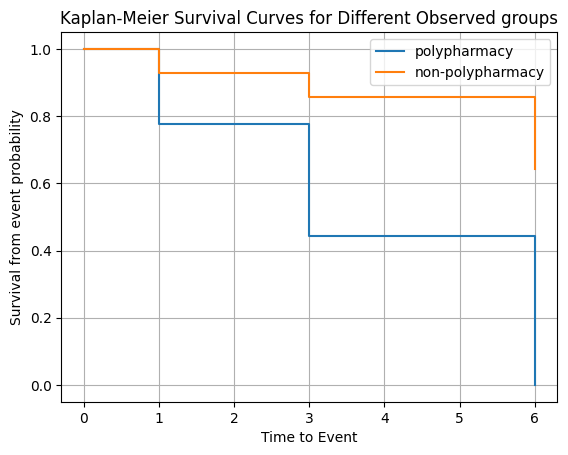

In [43]:
time = fall_survival['time_to_event(month)']
event = fall_survival['eventfall']

intervention_group = (fall_survival['polypharmacy'] >= 1)
control_group = (fall_survival['polypharmacy'] == 0)

km = KaplanMeierFitter()
km.fit(time[intervention_group], event[intervention_group], label = 'polypharmacy')
ax = km.plot(ci_show = False)

km.fit(time[control_group], event[control_group], label = 'non-polypharmacy')
km.plot(ax = ax, ci_show = False)

plt.title("Kaplan-Meier Survival Curves for Different Observed groups")
plt.xlabel("Time to Event")
plt.ylabel("Survival from event probability")
plt.grid(True)
plt.show()

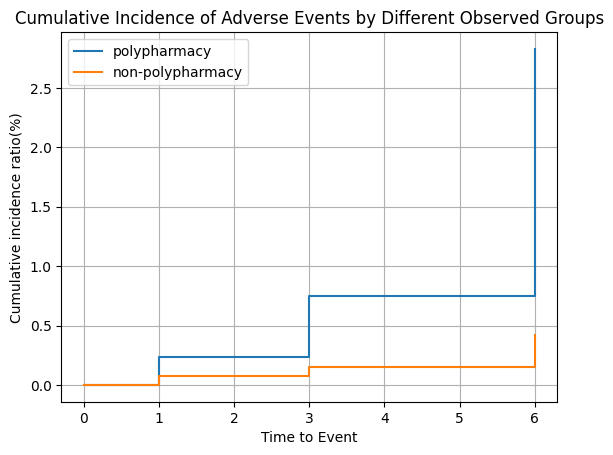

In [44]:
na = NelsonAalenFitter()
na.fit(time[intervention_group], event[intervention_group], label = 'polypharmacy')
ax = na.plot(ci_show = False)

na.fit(time[control_group], event[control_group], label = 'non-polypharmacy')

na.plot_cumulative_hazard(ax = ax, ci_show = False)

plt.title("Cumulative Incidence of Adverse Events by Different Observed Groups")
plt.xlabel('Time to Event')
plt.ylabel('Cumulative incidence ratio(%)')
plt.grid(True)
plt.show()

The exp(coef) is Hazard Ratio.


,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,cmp to,z,p,-log2(p)
covariate,,,,,,,,,,,
polypharmacy,1.225340,3.405324,0.599169,0.050991,2.399690,1.052313,11.019758,0.0,2.045066,0.040848,4.613579
age,0.002773,1.002777,0.056958,-0.108863,0.114408,0.896854,1.121210,0.0,0.048681,0.961173,0.057132
dm,2.264915,9.630304,1.113423,0.082645,4.447185,1.086156,85.386216,0.0,2.034190,0.041932,4.575789


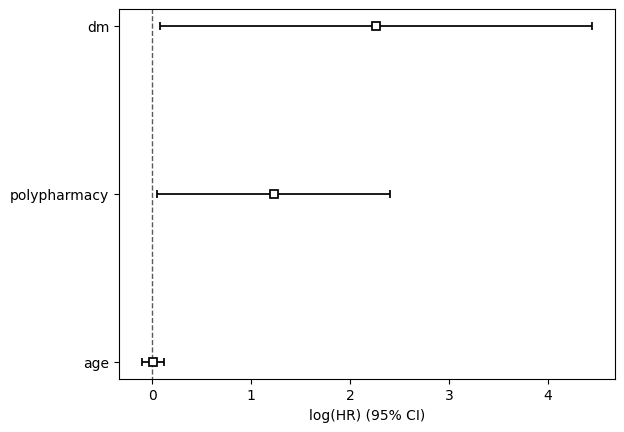

In [45]:
cox = CoxPHFitter()
cox.fit(fall_survival, 'time_to_event(month)', event_col = 'eventfall')
print('The exp(coef) is Hazard Ratio.')
cox.plot()
cox.summary

# MIXED MODEL ANOVA FOR COST UTILIZATION

Feature selection

In [46]:
fall.columns

Index(['ID', 'cost_T0', 'cost_T1', 'cost_T2', 'time_to_event(month)',
       'eventfall', 'fatigue', 'resistance', 'ambulation', 'multicomorbd',
       'weightloss', 'frail', 'gender', 'age', 'problem', 'problemimpact',
       'bw', 'ht', 'bmi', 'previousfall', 'alone', 'exercise', 'polypharmacy',
       'smoking', 'alcohol', 'underlying', 'knowfrail', 'frailimpact', 'dm',
       'dlp'],
      dtype='object')

In [59]:
fall_cost = fall.loc[:, ['ID', 'cost_T0', 'cost_T1', 'cost_T2', 'dm', 'polypharmacy', 'age']]
fall_cost

,ID,cost_T0,cost_T1,cost_T2,dm,polypharmacy,age
0,0,0,1000,1500,0,0,75
1,1,0,1000,1500,0,0,75
2,2,0,2000,3000,1,0,66
3,3,0,2200,2500,1,1,63
4,4,0,700,750,0,0,84
5,5,0,700,750,0,0,71
6,6,0,50,50,0,0,67
7,7,0,50,50,0,0,67
8,8,0,1800,2500,1,0,64
9,9,0,1000,1500,0,0,66


Feature engineering : Melt the data

In [60]:
cost = pd.melt(fall_cost, id_vars = ['ID', 'dm', 'polypharmacy', 'age'], value_vars = ['cost_T0', 'cost_T1', 'cost_T2'], var_name = 'newcolumn_time_point', value_name = 'cost')
cost

,ID,dm,polypharmacy,age,newcolumn_time_point,cost
0,0,0,0,75,cost_T0,0
1,1,0,0,75,cost_T0,0
2,2,1,0,66,cost_T0,0
3,3,1,1,63,cost_T0,0
4,4,0,0,84,cost_T0,0
...,...,...,...,...,...,...
94,28,0,0,64,cost_T2,3000
95,29,1,1,63,cost_T2,3000
96,30,1,1,72,cost_T2,3500
97,31,0,1,79,cost_T2,3500


In [61]:
formula = 'cost ~ newcolumn_time_point + dm + polypharmacy + age + (1 | ID)' 
lmm = smf.mixedlm(formula, cost, groups=cost['ID']).fit()
print(lmm.summary())

                       Mixed Linear Model Regression Results
Model:                     MixedLM         Dependent Variable:         cost        
No. Observations:          99              Method:                     REML        
No. Groups:                33              Scale:                      1126996.5100
Min. group size:           3               Log-Likelihood:             -800.7402   
Max. group size:           3               Converged:                  Yes         
Mean group size:           3.0                                                     
-----------------------------------------------------------------------------------
                                  Coef.    Std.Err.   z    P>|z|   [0.025   0.975] 
-----------------------------------------------------------------------------------
Intercept                        -2695.881 2064.995 -1.306 0.192 -6743.197 1351.435
newcolumn_time_point[T.cost_T1]   2282.424  261.348  8.733 0.000  1770.191 2794.657
newcolumn_time_

C:\Users\USER\AppData\Local\Temp\ipykernel_6456\983385822.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=cost, x='newcolumn_time_point', y='cost', hue='dm', style = 'polypharmacy', markers=True, ci=None, palette='Set1')


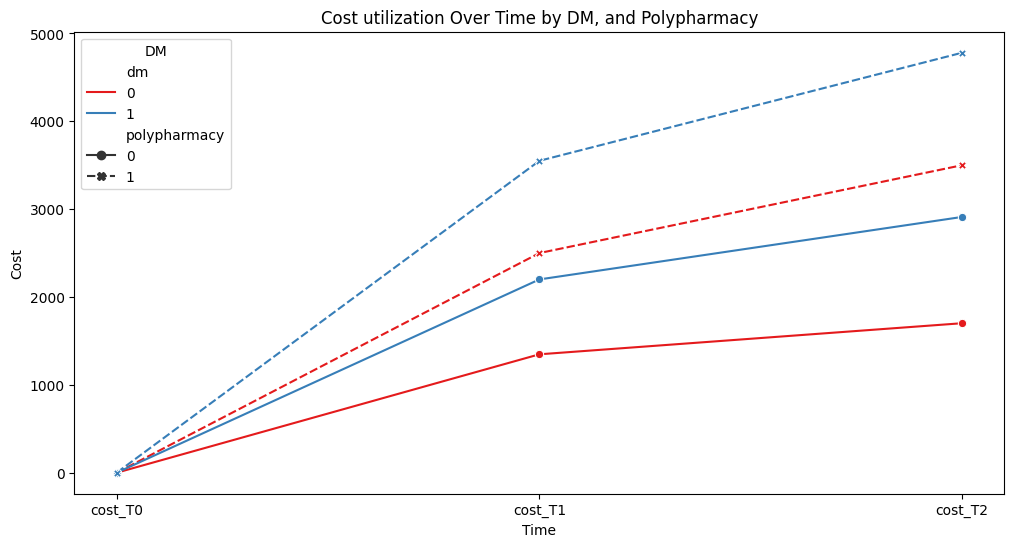

In [62]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=cost, x='newcolumn_time_point', y='cost', hue='dm', style = 'polypharmacy', markers=True, ci=None, palette='Set1')
plt.title('Cost utilization Over Time by DM, and Polypharmacy')
plt.xlabel('Time')
plt.ylabel('Cost')
plt.legend(title='DM')
plt.show()

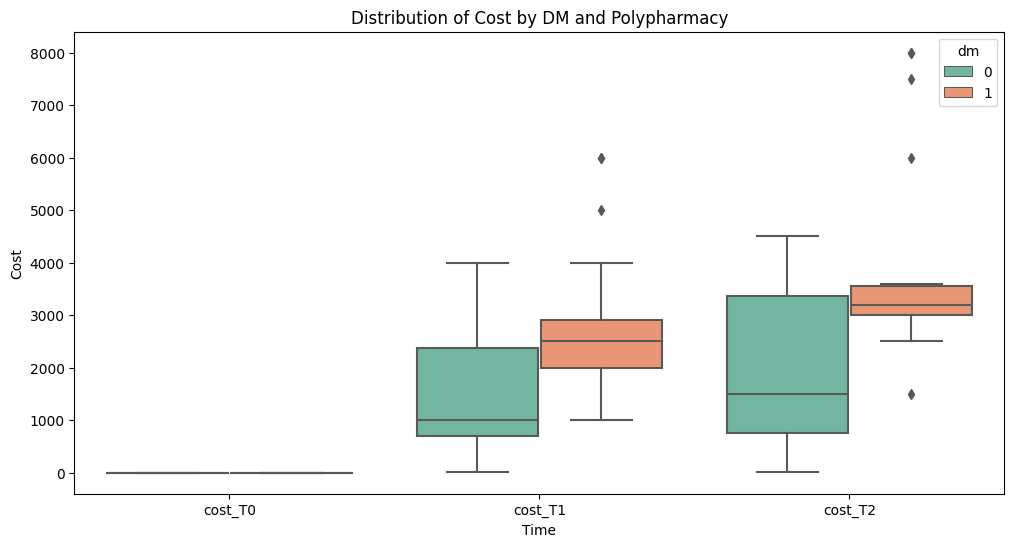

In [64]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=cost, x='newcolumn_time_point', y='cost', hue='dm', palette='Set2')
plt.title('Distribution of Cost by DM and Polypharmacy')
plt.xlabel('Time')
plt.ylabel('Cost')
plt.show()

# PROPENSITY SCORE MATCHING

In [12]:
exposure = fall['dm']
covariates = fall[['age', 'ht']]

In [20]:
covariates['age'][covariates['age'].isna() == True] = 70

C:\Users\USER\AppData\Local\Temp\ipykernel_10720\1329026236.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covariates['age'][covariates['age'].isna() == True] = 70


In [24]:
covariates = add_constant(covariates)
logit_model = LogisticRegression()
logit_model.fit(covariates, exposure)
fall['propensity_score'] = logit_model.predict_proba(covariates)[:, 1]


In [30]:
exposed = fall[fall['dm'] == 1]
non_exposed = fall[fall['dm'] == 0]
distance_matrix = pairwise_distances(exposed[['propensity_score']], non_exposed[['propensity_score']], metric='euclidean')
row_indices, col_indices = linear_sum_assignment(distance_matrix)

matched_exposed = exposed.iloc[row_indices]
matched_non_exposed = non_exposed.iloc[col_indices]

matched_data = pd.concat([matched_exposed, matched_non_exposed])
matched_data

,ID,cost_T0,cost_T1,cost_T2,time_to_event(month),eventfall,fatigue,resistance,ambulation,multicomorbd,...,exercise,polypharmacy,smoking,alcohol,underlying,knowfrail,frailimpact,dm,dlp,propensity_score
2,2,0.0,2000.0,3000.0,6.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,no,no,"[dm,ht,dlp]",0.0,very,1,1,0.726666
3,3,0.0,2200.0,2500.0,3.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,no,previous,"[dm,ht,dlp,gout]",0.0,moderate,1,1,0.792705
8,8,0.0,1800.0,2500.0,6.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,previous,previous,"[dm,ht,dlp,gad]",1.0,prepare,1,1,0.772086
10,10,0.0,5000.0,7500.0,1.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,no,no,"[dm,ht,dlp,ccd,gad]",1.0,very,1,1,0.648906
11,11,0.0,6000.0,8000.0,6.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,no,no,"[dm,ht,dlp,hf]",0.0,very,1,1,0.701948
15,15,0.0,2000.0,2500.0,6.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,no,no,"[dm,ht,dlp]",0.0,very,1,1,0.412124
21,21,0.0,2600.0,3000.0,3.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,no,no,"[dm,ht]",0.0,very,1,0,0.620826
22,22,0.0,2800.0,3200.0,6.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,no,no,"[dm,ht,dlp]",0.0,moderate,1,1,0.532335
24,24,0.0,3000.0,3600.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,current,no,"[dm,ht,dlp,dyspepsia]",0.0,moderate,1,1,0.532335
25,25,0.0,6000.0,8000.0,3.0,1.0,0.0,1.0,1.0,0.0,...,1.0,1.0,no,no,"[dm,ht,dlp,stroke]",1.0,moderate,1,1,0.620826


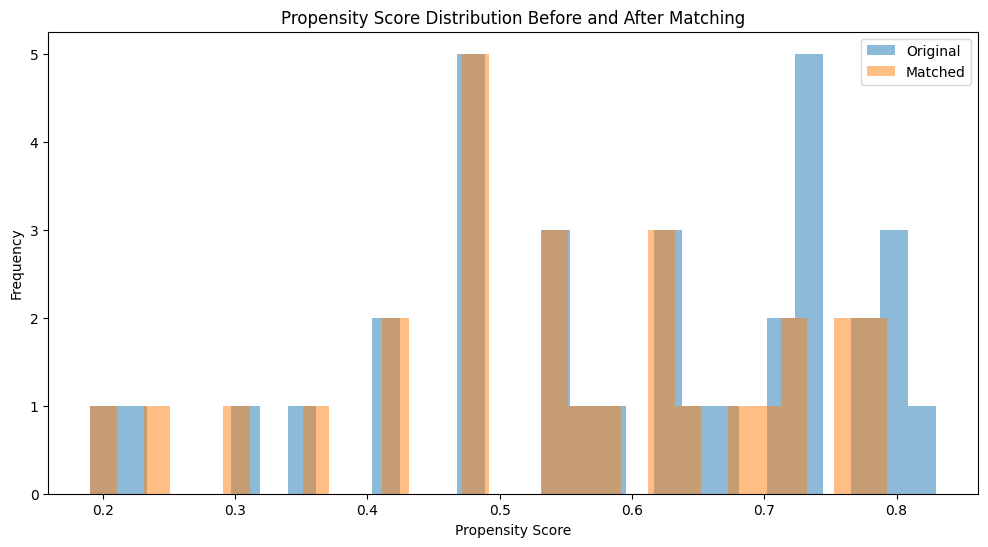

In [31]:
plt.figure(figsize=(12, 6))
plt.hist(fall['propensity_score'], bins=30, alpha=0.5, label='Original')
plt.hist(matched_data['propensity_score'], bins=30, alpha=0.5, label='Matched')
plt.xlabel('Propensity Score')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.title('Propensity Score Distribution Before and After Matching')
plt.show()

In [37]:
len(fall)

34

In [36]:
len(matched_data)

28

In [34]:
fall.groupby('dm')['ht'].value_counts(normalize = True)

dm  ht
0   1     0.785714
    0     0.214286
1   1     0.950000
    0     0.050000
Name: ht, dtype: float64

In [35]:
matched_data.groupby('dm')['ht'].value_counts(normalize = True)

dm  ht
0   1     0.785714
    0     0.214286
1   1     0.928571
    0     0.071429
Name: ht, dtype: float64